## Make Prediction Using MLPRegressor

In [1]:
import datetime
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from preprocessing import PrepareData

/home/joannelam/Projects/my_project/lib/python2.7/site-packages/pandas/_libs/__init__.py:3: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/home/joannelam/Projects/my_project/lib/python2.7/site-packages/pandas/_libs/__init__.py:3: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/home/joannelam/Projects/my_project/lib/python2.7/site-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/home/joannelam/Projects/my_project/lib/python2.7/site-packages/pandas/__init__.py:26: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  from pandas._libs import (hashtable as 

/home/joannelam/Projects/my_project/lib/python2.7/site-packages/scipy/interpolate/_bsplines.py:10: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _bspl
/home/joannelam/Projects/my_project/lib/python2.7/site-packages/scipy/spatial/__init__.py:95: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .ckdtree import *
/home/joannelam/Projects/my_project/lib/python2.7/site-packages/scipy/spatial/__init__.py:96: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .qhull import *
/home/joannelam/Projects/my_project/lib/python2.7/site-packages/scipy/spatial/_spherical_voronoi.py:18: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _voronoi
/home/joannelam/Projects/my_project/lib/python2.7/site-packages/scipy/spatial/distance.py:122: RuntimeWarning: numpy.d

In [14]:
ppd = PrepareData()
sale_attrs = ppd.sales_attrs + ['Id']
df, sales = ppd.get_train_data(drop_cols=sale_attrs)
sale_price = df[['SalePrice']].values
# drop sale price before training
df.drop("SalePrice", axis=1, inplace=True)
values = df.values
y = sale_price.reshape(-1, 1)

In [15]:
# split into train and test sets
n_train_time = int(len(y)*0.9)
train_x = values[:n_train_time, :]
train_y = y[:n_train_time]
test_x = values[n_train_time:, :]
test_y = y[n_train_time:]

RMSE is: 0.0011020633974364337


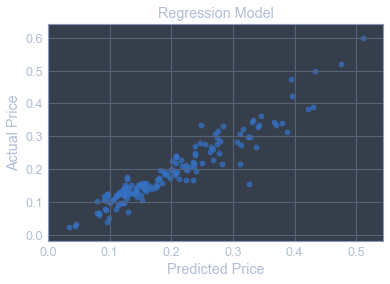

In [16]:
clf = MLPRegressor(alpha =1, hidden_layer_sizes=200)
clf.fit(train_x, train_y)

predictions = clf.predict(test_x)
actual_values = test_y

print 'RMSE is:', mean_squared_error(test_y , predictions)
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Regression Model')
plt.show()

### Make Prediction on Test Data

In [17]:
test_df, test_ids = ppd.get_test_data()

def convert_to_price(sales, predict_results):
    max_s = sales.SalePrice.max()
    min_s = sales.SalePrice.min()
    predicted_p = predict_results*(max_s - min_s) + min_s
    return predicted_p

clf = MLPRegressor(alpha=1, hidden_layer_sizes=200)
clf.fit(values, y)
predict_results = clf.predict(test_df)
price = convert_to_price(sales, predict_results)
test_ids['SalePrice'] = price.transpose()
test_ids.to_csv("submission_nn.csv", index=False)